In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def trend_sequence(n, sign, sigma):
    return np.cumsum(np.random.normal(loc=sign * sigma ** 2, scale=sigma, size=n))

def noisy_sin(n, A, sigma, w):
    phi = 2 * np.pi * np.random.random()
    b = np.random.normal(scale=1)
    x = np.linspace(0, 8 * np.pi, n)
    return A * np.sin(2 * np.pi * w * x + phi) + np.random.normal(scale=sigma, size=n) + b

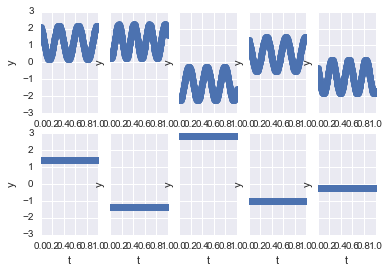

In [2]:
np.random.seed(0)
n = 250
N_train = 5000; N_val = 1000; N_test = 1000; N = N_train + N_val + N_test
train = np.arange(N_train); test = np.arange(N_test) + N_train; val = np.arange(N_val) + N_train + N_test

w_min = 0.02; w_max = 0.2
w = w_min + np.random.random(N) * (w_max - w_min)
A = 1.0; sigma = 0.0001
Y = (np.random.random(N) > 0.5).astype('int') # binary: periodic or not
X = np.array([noisy_sin(n, A * y_i, sigma, w_i) for y_i, w_i in zip(Y, w)])
#X = np.array([trend_sequence(n, y_i, sigma) for y_i in Y])
#Y = 1 / ((w_max - w_min) * np.random.random(size=N,) + w_min) # random period
#X = np.array([noisy_sin(n, A, sigma, 1 / y_i) for y_i in Y])

n_plots = 5
fig, ax = plt.subplots(2, n_plots, sharey=True)
for j in range(ax.shape[1]):
    ax[0, j].plot(np.linspace(0, 1, n), X[np.where(Y==1)[0][j]], 'o')
    ax[0, j].set(xlabel="t", ylabel="y")
    ax[1, j].plot(np.linspace(0, 1, n), X[np.where(Y==0)[0][j - n_plots]], 'o')
    ax[1, j].set(xlabel="t", ylabel="y")
#fig, ax = plt.subplots(1, n_plots, sharey=True)
#for j in range(n_plots):
#    ax[j].plot(np.linspace(0, 1, n), X[train[j]], 'o')
#    ax[j].set(xlabel="t", ylabel="y")

In [3]:
import sklearn.linear_model

model = sklearn.linear_model.LogisticRegression()
#model = sklearn.linear_model.LinearRegression()
model.fit(X[train], Y[train])
print(np.mean((model.predict(X[test].squeeze()) - Y[test]) ** 2))
print(np.var(Y[test]))

0.422
0.249991


In [15]:
i = train[5]

0.136260940352 0.13639578623


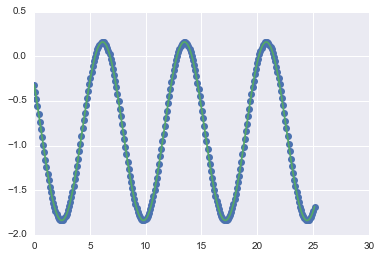

In [16]:
import gatspy

t = np.linspace(0, 8 * np.pi, n)
m = X[i]
e = np.repeat(1e-5, len(t))
#fset_train['lomb_scargle_fast_freq'] = 1 / fset_train.period_fast
#fset_test['lomb_scargle_fast_freq'] = 1 / fset_test.period_fast
#plt.plot(t, m)

dt = t.max() - t.min()
opt_args = {'period_range': (2 * dt / len(t), dt), 'quiet': True}
model = gatspy.periodic.LombScargleFast(fit_period=True, optimizer_kwds=opt_args)
model.fit(t, m, e)
plt.plot(t, m, 'o')
plt.plot(t, model.predict(t))
print(w[i], 1 / model.best_period)

0.136260940352 29.8590588735


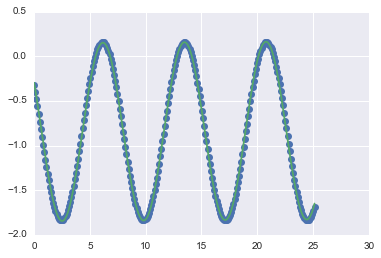

In [17]:
from cesium.science_features import lomb_scargle, lomb_scargle_fast_period

m = X[i]
ls_fit = lomb_scargle.lomb_scargle_model(t, m, np.repeat(1e-5, len(t)))
plt.plot(t, m, 'o')
plt.plot(t, ls_fit['freq_fits'][0]['model'])
print(w[i], ls_fit['freq_fits'][0]['freq'])